In [1]:
import zipfile as ZipFile
from google.colab import files
from fastai import *
from fastai.vision import *
from PIL import Image

In [2]:
! pip install kaggle

In [3]:
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"roshanrsurk19cs2008","key":"819bb1f19f7a9fbfd8799e7069958548"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d datamunge/intrusion-detection-as-an-image-classifier

 97% 147M/151M [00:01<00:00, 102MB/s]
100% 151M/151M [00:01<00:00, 116MB/s]


In [6]:
!unzip "/content/intrusion-detection-as-an-image-classifier.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/normal/81251.jpg  
  inflating: train/normal/81252.jpg  
  inflating: train/normal/81253.jpg  
  inflating: train/normal/81254.jpg  
  inflating: train/normal/81255.jpg  
  inflating: train/normal/81256.jpg  
  inflating: train/normal/81257.jpg  
  inflating: train/normal/81258.jpg  
  inflating: train/normal/81259.jpg  
  inflating: train/normal/81260.jpg  
  inflating: train/normal/81261.jpg  
  inflating: train/normal/81262.jpg  
  inflating: train/normal/81263.jpg  
  inflating: train/normal/81264.jpg  
  inflating: train/normal/81265.jpg  
  inflating: train/normal/81266.jpg  
  inflating: train/normal/81267.jpg  
  inflating: train/normal/81268.jpg  
  inflating: train/normal/81269.jpg  
  inflating: train/normal/81270.jpg  
  inflating: train/normal/81271.jpg  
  inflating: train/normal/81272.jpg  
  inflating: train/normal/81273.jpg  
  inflating: train/normal/81274.jpg  
  inflating: train/normal/81275.jpg  

In [7]:
PATH = "/content/train"

In [8]:
np.random.seed(24)

In [9]:
tfms = get_transforms(do_flip=True)



In [10]:
 data=ImageDataBunch.from_folder(PATH, valid_pct=0.2, ds_tfms=tfms, size=224, bs=16).normalize(imagenet_stats)

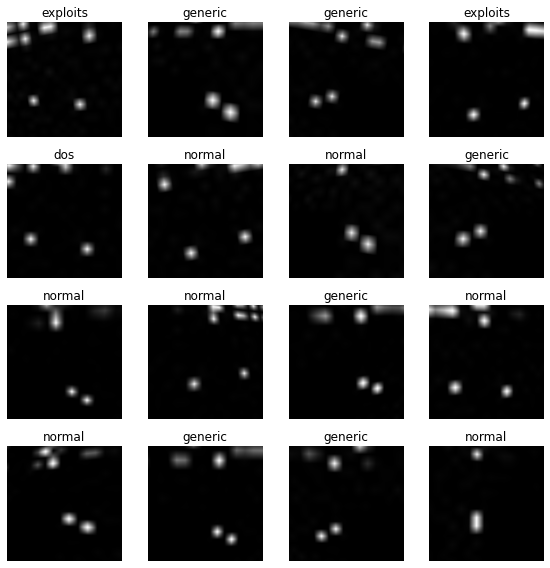

In [ ]:
data.show_batch(rows=4, figsize=(8, 8))



In [17]:
learn = cnn_learner(data, models.densenet161, metrics=accuracy)



In [16]:
 learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.671877,0.696943,0.788655,21:40
1,0.649190,0.559249,0.796733,21:45
2,0.650524,0.501811,0.807725,21:47
3,0.544850,0.497384,0.812401,21:45
4,0.518240,0.542368,0.817442,21:44
5,0.511052,0.527950,0.820236,21:45


In [ ]:
I=open_image("/content/test/analysis/047933.jpg")
I

In [ ]:
pred_class,_,_ = learn.predict(I)
pred_class

Category tensor(3)

In [ ]:
J=open_image("/content/test/backdoor/047912.jpg")
J

In [ ]:
pred_class,_,_ = learn.predict(J)
pred_class

Category tensor(2)